# KNN
- K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks.
- It's a simple and intuitive algorithm that makes predictions based on the similarity between data points.
- In KNN, the "K" represents the number of nearest neighbors to consider.
- KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution. 
    - It's also known as a "lazy learning" algorithm because it doesn't build an explicit model during training. 
    - Instead, it relies on the entire training dataset to make predictions, which can make it computationally expensive for large datasets.

## Dataset

In [1]:
# Sklearn datasets are included as part of the scikit-learn (sklearn) library, so they come pre-installed with the library. 
# Due to this, we can easily access and load these datasets, without having to download them separately.

# Here, we load the Iris dataset
# This is a popular dataset often used for practicing and demonstrating machine learning and classification algorithms
from sklearn.datasets import load_iris

# imports the numpy and pandas libraries
import pandas as pd
import numpy as np

In [2]:
# The load_iris function is called to load the Iris dataset
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# creates a Pandas DataFrame named iris_df using the Iris dataset's feature_names 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# A new column named "target" is added to the iris_df DataFrame. The values for this column are taken from iris.target
iris_df["target"] = iris.target

# Display the dataframe
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# Determine the shape or dimensions of the Pandas DataFrame iris_df
iris_df.shape

(150, 5)

In [5]:
# Retrieve and display the column names of the Pandas DataFrame iris_df
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
# Obtain a concise summary of the information about the Pandas DataFrame iris_df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
# Obtain a statistical summary of the numerical columns in a Pandas DataFrame iris_df while excluding the last (target) column
iris_df.iloc[:,:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Count the number of missing (null) values in each column of the Pandas DataFrame iris_df
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Modelling

In [9]:
# Import the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import the train_test_split function from the sklearn.model_selection module 
# The train_test_split function is used to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [10]:
# new variable X is created to store the feature variables for your machine learning model
X = iris_df.drop(["target"], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# A new variable y is created to store the target variable (class labels) for your machine learning model
y = iris_df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [12]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(4, array([0, 1, 2]))

In [13]:
# train_test_split is used to split features X and target variable y into training and testing sets
# test_size parameter specifies the proportion of the data allocated for the testing set, which is set to 20% in this case.
# X_train: This variable contains the feature data for the training set.
# X_test: This variable contains the feature data for the testing set.
# y_train: This variable contains the target labels for the training set.
# y_test: This variable contains the target labels for the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [14]:
# A KNN classifier model is created and assigned to the variable "knn"
# n_neighbors=5: This parameter specifies the number of neighbors (K) to consider when making predictions
# metric='minkowski': The metric parameter determines the distance metric used to calculate the distance between data points
# p=2: The p parameter controls the power parameter for the 'minkowski' distance metric 
#   When p=2, it corresponds to the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train the KNN classifier model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Calculate and print the accuracy of the KNN classifier model on the training set
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))

# Calculate and print the accuracy of the KNN classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 1.000


## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# The KNN classifier model (knn) is used to make predictions on the feature data from the testing dataset (X_test)
y_prediction = knn.predict(X_test)

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_prediction)
cm = confusion_matrix(y_test, y_prediction)

print(cm)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


### Generate seaborn heatmap for the confusion matrix

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

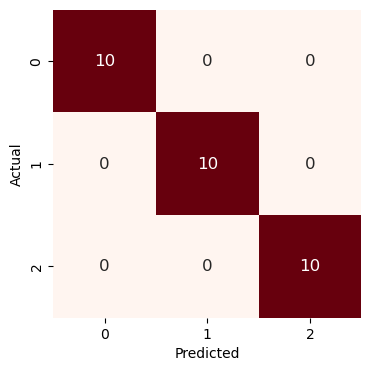

In [19]:
# Creates a Pandas DataFrame df_cm to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sb.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

## Choose K-Values

In [20]:
# Generate function to add error rates of KNN with various k-values
# error_rate = []: Empty list to gather error rates at various k-values
# for i in range(1, 50): Loop through k values 1 to 50
# knn: Create instance of KNeighborsClassifier with various k
# knn.fit: Train the model
# pred_i: Conduct predictions from model on test subset
# error_rate.append: Add error rate of model with various k-value, using the average where prediction not
# np.mean(pred_i != y_test): Calculate the error rate for the specific value of the parameter being tested
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

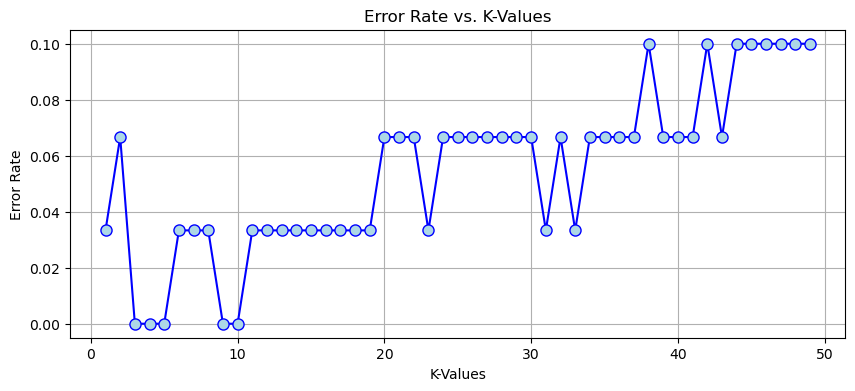

In [21]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))

# Generate the line plot for the error rate over different values of K
plt.plot(range(1, 50), error_rate, color='blue', linestyle='-', marker='o', markerfacecolor='lightblue', markersize=8)

plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
plt.grid() 

plt.show()